# 파이썬과 SQL연동

## 연동 프로그래밍 기본

### 연동프로그램을 위한 쇼핑몰 생성

In [ ]:
# 연동을 위한 쇼핑몰 DB생성
DROP DATABASE IF EXISTS soloDB;
CREATE DATABASE soloDB;

* soloDB 생성한 후에는 더이상 MySQL워크벤치를 사용하지 않는다.

### 파이썬에서 데이터 입력

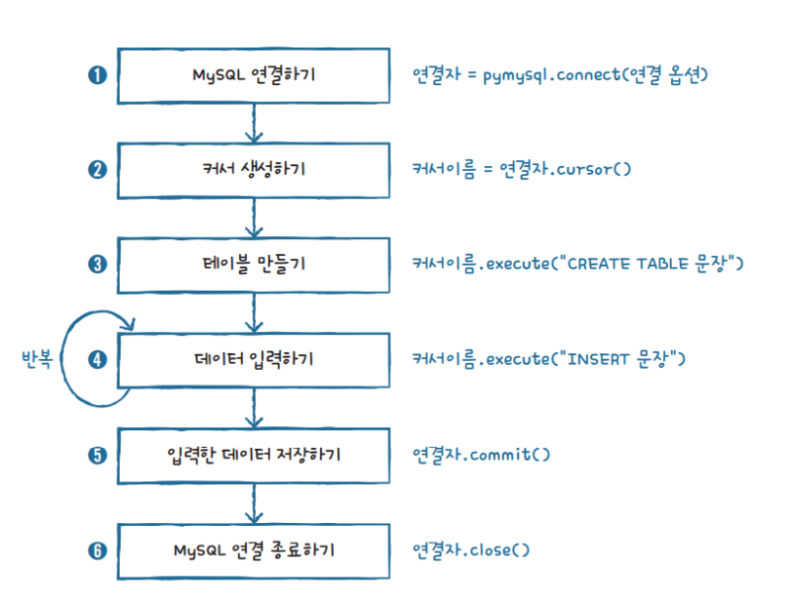

In [ ]:
# 데이터베이스와 연동 예시문
# 실행 전에 아나콘다 프롬포트에서 'pip install pymysql'설치
pymysql.connect(host=서버IP주소, user=사용자, password=암호, db=데이터베이스, charset=문자세트)

* 아래와 같이 연결이 성공되도 아무런 메시지는 나오지 않는다.

In [1]:
# MySQL과 연동하기
import pymysql
conn = pymysql.connect(host = '127.0.0.1', user = 'root', password = '0000', db = 'soloDB', charset = 'utf8')

* 커서는 데이터베이스에 SQL문을 실행하거나 실행된 결과를 돌려받는 통로로 생각하면 된다.

In [2]:
# 커서 사용
cur = conn.cursor()

* 테이블을 만드는 SQL문을 커서이름.execute()함수의 매개변수로 넘겨주면 SQL문이 데이터베이스에 실행된다.

In [3]:
# 테이블 만들기
cur.execute("CREATE TABLE userTable (id char(4), userName char(15), email char(20), birthYear int)")

0

* 데이터는 필요한 만큼 반복해서 입력
* 데이터 입력도 SQL문을 사용해야 하므로 커서이름.execute()함수 사용

In [4]:
# 데이터 삽입
cur.execute("INSERT INTO userTable VALUES('hong', '홍지윤', 'hong@naver.com', 1996)")

1

In [5]:
cur.execute("INSERT INTO userTable VALUES('kim', '김태연', 'kim@daum.net', 2011)")

1

In [6]:
cur.execute("INSERT INTO userTable VALUES('star', '별사랑', 'star@paran.com', 1990)")

1

In [7]:
cur.execute("INSERT INTO userTable VALUES('yang', '양지은', 'yang@gmail.com', 1993)")

1

* 입력한 4건의 데이터는 아직 데이터베이스에 완전히 저장된 것은 아니다.
* 임시로 저장된 상태로 이를 확실하게 저장하는 것을 커밋이라고 한다.

In [8]:
# 커밋을 통해 데이터 저장
conn.commit()

In [9]:
# 데이터베이스를 모두 사용했다면 닫아준다
conn.close()

## 연동 프로그래밍 활용

### 완전한 데이터 입력 프로그램의 완성

* 사용자가 반복해서 데이터를 입력하는 코드 작성

In [10]:
# 데이터 입력 프로그램
import pymysql

# 전역변수 선언부
conn, cur = None, None
data1, data2, data3, data4 = "", "", "", ""
sql = ""

# 메인코드
conn = pymysql.connect(host = '127.0.0.1', user = 'root', password = '0000', db = 'soloDB', charset = 'utf8')
cur = conn.cursor()

# 무한 반복하면서 data1~data4를 입력받는다. data1에서 아무것도 입력받지 않고 enter키를 입력하면 while종료
while True:
    data1 = input("사용자 ID ==> ")
    if data1 == "":
        break;
    data2 = input("사용자 이름 ==> ")
    data3 = input("사용자 이메일 ==> ")
    data4 = input("사용자 출생연도 ==> ")
    # INSERT 문으로 입력한 데이터를 sql변수에 문자열로 만든다.
    # 주의할 점은 data1~data3은 작은따옴표로 묶어야 하고, 마지막 data4는 정수이므로 작은따옴표로 묶으면 안된다
    sql = "INSERT INTO userTable VALUES('" + data1 + "', '" + data2 + "', '" + data3 + "'," + data4 + ")"
    cur.execute(sql)

conn.commit()
conn.close()

사용자 ID ==>  su
사용자 이름 ==>  수지
사용자 이메일 ==>  suji@hanbit.com
사용자 출생연도 ==>  1994
사용자 ID ==>  


### MySQL의 데이터 조회를 위한 파이썬 코딩 순서

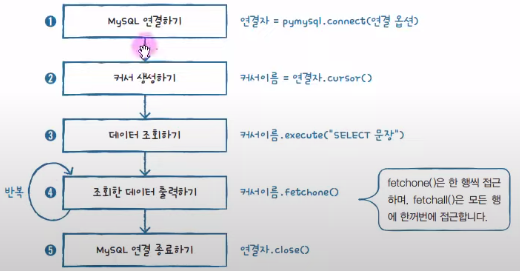

### 완전한 데이터 조회 프로그램의 완성

In [11]:
# 데이터 조회 프로그램
import pymysql

# 전역변수 선언부
con, cur = None, None
data1, data2, data3, data4 = "", "", "", ""
row = None

# 메인코드
conn = pymysql.connect(host = '127.0.0.1', user = 'root', password = '0000', db = 'soloDB', charset = 'utf8')
cur = conn.cursor()
cur.execute("SELECT * FROM userTable")

print("사용자ID     사용자이름     이메일     출생연도")
print("-----------------------------------------------")

while True:
    row = cur.fetchone()
    if row == None:
        break
    data1 = row[0]
    data2 = row[1]
    data3 = row[2]
    data4 = row[3]
    print("%5s     %15s     %20s     %d" % (data1, data2, data3, data4))

conn.close()

사용자ID     사용자이름     이메일     출생연도
-----------------------------------------------
 hong                 홍지윤           hong@naver.com     1996
  kim                 김태연             kim@daum.net     2011
 star                 별사랑           star@paran.com     1990
 yang                 양지은           yang@gmail.com     1993
   su                  수지          suji@hanbit.com     1994
